In [5]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('internship_train.csv')
targets = df['target']
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'), 
    targets, 
    test_size=0.001, 
    shuffle=True)

In [6]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='regression.h5', monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-6)   
]

In [7]:
import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.metrics import RootMeanSquaredError


normalizer = layers.Normalization(input_shape=[53,], axis=None)

def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics = ['RootMeanSquaredError'] )
    return model

model = build_and_compile_model(normalizer)
#model.summary()

In [8]:
history = model.fit(X_train, y_train, batch_size=64,validation_split = 0.2, epochs=40, callbacks = callbacks)

Epoch 1/40
1124/1124 [==============================] - 3s 2ms/step - loss: 25.9244 - root_mean_squared_error: 30.5024 - val_loss: 25.5878 - val_root_mean_squared_error: 29.9231

Epoch 00001: val_loss improved from inf to 25.58778, saving model to model.h5
Epoch 2/40
1124/1124 [==============================] - 2s 2ms/step - loss: 25.4058 - root_mean_squared_error: 29.5860 - val_loss: 25.2239 - val_root_mean_squared_error: 29.2482

Epoch 00002: val_loss improved from 25.58778 to 25.22392, saving model to model.h5
Epoch 3/40
1124/1124 [==============================] - 2s 2ms/step - loss: 25.3044 - root_mean_squared_error: 29.4091 - val_loss: 25.4629 - val_root_mean_squared_error: 29.5678

Epoch 00003: val_loss did not improve from 25.22392
Epoch 4/40
1124/1124 [==============================] - 2s 2ms/step - loss: 25.2741 - root_mean_squared_error: 29.3546 - val_loss: 25.5037 - val_root_mean_squared_error: 29.6473

Epoch 00004: val_loss did not improve from 25.22392
Epoch 5/40
1124/112

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,lr,epoch
35,1.765221,2.424739,1.694651,2.344879,0.000250,35
36,1.755332,2.415820,1.992387,2.668187,0.000250,36
37,1.737072,2.389747,1.757598,2.400681,0.000250,37
38,1.732239,2.375457,1.715544,2.351883,0.000250,38
39,1.626335,2.257421,1.682828,2.321895,0.000125,39


In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 30])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

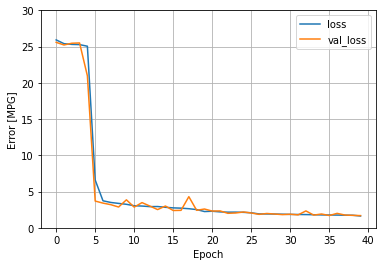

In [11]:
plot_loss(history)

Test

In [13]:
test = pd.read_csv('internship_hidden_test.csv')
preds = model.predict(test)
preds_df = pd.DataFrame(preds, columns = ['preds'])
preds_df

,preds
0,9.755246
1,79.959122
2,8.276759
3,38.865379
4,62.086823
...,...
9995,47.675591
9996,32.414650
9997,22.716415
9998,15.649108


In [14]:
preds_df.to_csv('preds_df.csv')